In [2]:
# statistike za vrednosti piksela - mean i stddev.
import cv2
cv2.imshow('Picture',img1)
img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(img1_gray)
print("min: %.2f, max: %.2f"% (minVal, maxVal))
print("min loc: ", minLoc)
print("max loc: ", maxLoc)

means, stddev = cv2.meanStdDev(img1_gray)
print("mean: %.2f, stddev: %.2f"% (means, stddev))

img1_gray[np.where(img1_gray < means)] = 0 # na mestima gde je vrednost manja od sv, neka pixeli budu crne boje
img1_gray[np.where(img1_gray> means)] = 255 # na mestima gde je vrednost pixela slike veća od sv (npr. nebo), neka pixeli budu bele boje
cv2.imshow("binary", img1_gray)



cv2.waitKey(0)
cv2.destroyAllWindows()

min: 0.00, max: 255.00
min loc:  (307, 177)
max loc:  (398, 206)
mean: 144.92, stddev: 66.05


C:\Users\Korisnik\AppData\Local\Temp\ipykernel_16624\1284436688.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("mean: %.2f, stddev: %.2f"% (means, stddev))


In [7]:
# normalizacija piksela: 
import cv2 
import numpy as np

cv2.imshow('Slika 1',img1) 
# img1_gray - grayscale, resized img1
gray = np.float32(img1_gray)
#print(gray)

#Norma MINMAX:

dst = np.zeros(gray.shape, dtype=np.float32) # matrica 0 dimenzija gray slike, koja ima float32 vrednosti
cv2.normalize(gray,dst=dst, alpha=0,beta=1.0,norm_type=cv2.NORM_MINMAX)
cv2.imshow("MIN MAX NORMA", dst)

#Norma L inf

dst2 = np.zeros(gray.shape, dtype=np.float32)
cv2.normalize(img1_gray,dst=dst2, alpha=0, beta=1.0, norm_type=cv2.NORM_INF) # cela crna slika
cv2.imshow('NORM INF', dst2)


dst3 = np.zeros(gray.shape, dtype=np.float32)
cv2.normalize(img1_gray, dst=dst3, alpha=0,beta=1.0,norm_type=cv2.NORM_L1)

cv2.imshow("L1",np.uint8(dst3*10000000))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
import cv2 as cv
import numpy as np

src = img1 
cv.namedWindow("input", cv.WINDOW_AUTOSIZE)
cv.imshow("input", src)
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

# 转换为浮点数类型数组
gray = np.float32(gray)
print(gray)

# scale and shift by NORM_MINMAX
dst = np.zeros(gray.shape, dtype=np.float32)
cv.normalize(gray, dst=dst, alpha=0, beta=1.0, norm_type=cv.NORM_MINMAX)
print(dst)
cv.imshow("NORM_MINMAX", np.uint8(dst*255))

# scale and shift by NORM_INF
dst = np.zeros(gray.shape, dtype=np.float32)
cv.normalize(gray, dst=dst, alpha=1.0, beta=0, norm_type=cv.NORM_INF)
print(dst)
cv.imshow("NORM_INF", np.uint8(dst*255))

# scale and shift by NORM_L1
dst = np.zeros(gray.shape, dtype=np.float32)
cv.normalize(gray, dst=dst, alpha=1.0, beta=0, norm_type=cv.NORM_L1)
print(dst)
cv.imshow("NORM_L1", np.uint8(dst*10000000))

# scale and shift by NORM_L2
dst = np.zeros(gray.shape, dtype=np.float32)
cv.normalize(gray, dst=dst, alpha=1.0, beta=0, norm_type=cv.NORM_L2)
print(dst)
cv.imshow("NORM_L2", np.uint8(dst*10000))

cv.waitKey(0)
cv.destroyAllWindows()

[[212. 212. 212. ... 226. 227. 226.]
 [213. 211. 212. ... 226. 226. 226.]
 [211. 210. 210. ... 226. 226. 226.]
 ...
 [ 86.  92.  65. ... 194. 193. 194.]
 [ 64.  80.  99. ... 195. 194. 194.]
 [ 85.  96.  93. ... 194. 194. 194.]]
[[0.8313726  0.8313726  0.8313726  ... 0.8862746  0.89019614 0.8862746 ]
 [0.8352942  0.82745105 0.8313726  ... 0.8862746  0.8862746  0.8862746 ]
 [0.82745105 0.8235295  0.8235295  ... 0.8862746  0.8862746  0.8862746 ]
 ...
 [0.3372549  0.36078432 0.25490198 ... 0.7607844  0.7568628  0.7607844 ]
 [0.2509804  0.3137255  0.38823533 ... 0.76470596 0.7607844  0.7607844 ]
 [0.33333334 0.37647063 0.3647059  ... 0.7607844  0.7607844  0.7607844 ]]
[[0.8313726  0.8313726  0.8313726  ... 0.8862746  0.89019614 0.8862746 ]
 [0.8352942  0.82745105 0.8313726  ... 0.8862746  0.8862746  0.8862746 ]
 [0.82745105 0.8235295  0.8235295  ... 0.8862746  0.8862746  0.8862746 ]
 ...
 [0.3372549  0.36078432 0.25490198 ... 0.7607844  0.7568628  0.7607844 ]
 [0.2509804  0.3137255  0.38823

In [22]:
import cv2
import numpy as np
img1 = cv2.imread('slike1/image1.jpg')
templ1 = cv2.imread('template1/template1.jpg')

#1. resize
h, w, _ = img1.shape 
h = int(0.15*h)
w = int(0.15*w)

h1, w1, _ = templ1.shape 
h1 = int(0.15*h1)
w1 = int(0.15*w1)

img1 = cv2.resize(img1,(w,h))
templ1 = cv2.resize(templ1, (w,h))

#2. from bgr to gray

img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
#print(img1_gray)
templ1_gray = cv2.cvtColor(templ1, cv2.COLOR_BGR2GRAY)
print(templ1_gray)
cv2.imshow('img1 before normalization',img1_gray)
cv2.imshow('templ1 before normalisation', templ1_gray)


img1_gray = np.float32(img1_gray)
templ1_gray = np.float32(templ1_gray)



#3. minmax normalization

dst_img1 = np.zeros(img1_gray.shape, dtype=np.float32)
cv2.normalize(img1_gray, dst=dst_img1,alpha=0, beta=1.0,norm_type=cv2.NORM_MINMAX)
#print(dst_img1)

dst_templ1 = np.zeros(templ1_gray.shape,dtype=np.float32)
cv2.normalize(templ1_gray,dst=dst_templ1,alpha=0,beta=1.0,norm_type=cv2.NORM_MINMAX)
#print(dst_templ1)


cv2.imshow('img1 after MINMAX',np.uint8(dst_img1*255))
cv2.imshow('templ1 after MINMAX', np.uint8(dst_templ1*255))
cv2.imshow('templ1', dst_templ1)

dst_img1= np.uint8(dst_img1*255) # NORMALIZOVANI GRAYSCALE IMAGE
#print(dst_img1)
dst_templ1 = np.uint8(dst_templ1*255) # NORMALIZOVANI GRAYSCALE TEMPLATE
#print(dst_templ1)

cv2.imshow('Jumbo sa template-a:', dst_templ1[63:63+40, 115:115+58])

#[63:63+31, 74:74+38], 82

jumbo_template = dst_templ1[63:63+40, 115:115+58] # TEMPLATE KOJI MI TREBA
dst_img1 # SLIKA NA KOJOJ TRAŽIM TAJ TEMPLATE

result = cv2.matchTemplate(dst_img1, jumbo_template, method= cv2.TM_CCOEFF_NORMED)
cv2.imshow('Result matrix', result)

_, maxVal, _, maxLoc = cv2.minMaxLoc(result)
print(maxLoc)
print(maxVal)
#371, 11
cv2.imshow('Rezultat MinMaxLoc jumbo znaka',dst_img1[maxLoc[1]:, maxLoc[0]:])

cv2.waitKey(0)
cv2.destroyAllWindows()

[[220 220 219 ... 101  99 100]
 [219 220 220 ... 103 103 100]
 [219 219 220 ... 103 101  99]
 ...
 [ 82  97  92 ...  71  55  85]
 [107  93  90 ...  70  69  68]
 [ 96  97  99 ...  64  67  67]]
(371, 11)
0.41800329089164734


In [23]:
#jumbo_template
dst_img1.shape

(388, 691)

In [175]:
import cv2 
import numpy as np
src = cv2.imread('slike1/image1.jpg')
src = cv2.resize(src, (int(0.15*src.shape[1]), int(0.15*src.shape[0])))

# X flip:
dst1 = cv2.flip(src,0) # nebo gore, trava dole - flip po x osi
cv2.imshow('X flip',dst1)

# Y flip
dst3 = cv2.flip(src,1)
cv2.imshow('Y flip',dst3)

# X flip + Y flip
dst2  = cv2.flip(src,-1) 
cv2.imshow('X - Y flip',dst2)

# X flip
#cv2.imshow('slika 1', src)
#cv2.imshow('ORIGINAL flip', src)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [177]:
# custom y-flip
h, w, ch = src.shape
dst = np.zeros(src.shape, src.dtype)
for row in range(h):
    for col in range(w):
        b, g, r = src[row, col]
        dst[row, w - col - 1] = [b, g, r]
cv2.imshow("custom-y-flip", dst)

In [1]:
#image interpolation 
import cv2
src = cv2.imread('slike1/image1.jpg')
h,w,_ = src.shape 
print(h,w)
dst = cv2.resize(src,(w*2,h*2), fx=0.75, fy=0.75, interpolation=cv2.INTER_NEAREST)
cv2.imshow('Inter nearest', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
#ostale interpolacije: cv2.INTER_LINEAR, cv2.INTER_LANCZOS4


2592 4608


In [ ]:
#Draw geometry

In [14]:
#ROI of image 
# ROI = Region of interest of image
import cv2
import numpy as np
src = cv2.imread('slike1/image1.jpg')
src = cv2.resize(src, (int(0.15*src.shape[1]), int(0.15*src.shape[0])))

h,w,_ = src.shape 
cy = h//2 # celobrojni deo koji ostane kada podelimo visinu sa 2
cx = w//2 
roi = src[cy-100:cy+100, cx-100:cx+100]
cv2.imshow('roi', roi)

# copy ROI: 
image = np.copy(roi)
#modifikuj roi:
roi[:,:,0] = 0
cv2.imshow('Modify roi', roi)

#modify+copy roi 
image[:,:,2] = 0
cv2.imshow('Modify+copy roi', image)


src = cv2.imread('experiment/test.png')
src = cv2.resize(src, (int(0.15*src.shape[1]), int(0.15*src.shape[0])))
hsv = cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
cv2.imshow('HSV',hsv)
mask = cv2.inRange(hsv,(35,43,46),(99,255,255)) # 1. tuple je DG r,g,b, a 2. tuple je GG r,g,b. Sve VAN OPSEGA je belo, a U OPSEGU je crno
cv2.imshow('Mask', mask)

# extract person:
mask = cv2.bitwise_not(mask)
person = cv2.bitwise_and(src,src,mask=mask)
cv2.imshow('person',person)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# Bilateral function - only those pixels having intensity almost the same as target pixel are considered.

# Bilateral filtering = reduction of noise + Preserving of edges
box_points = []
button_down = False
def click_and_crop(event, x, y, flags, param):
    global box_points, button_down
    if (button_down == False) and (event == cv2.EVENT_LBUTTONDOWN):
        button_down = True
        box_points = [(x, y)]
    elif (button_down == True) and (event == cv2.EVENT_MOUSEMOVE):
        image_copy = param.copy()
        point = (x, y)
        cv2.rectangle(image_copy, box_points[0], point, (0, 255, 0), 2)
        cv2.imshow("Template Cropper - Press C to Crop", image_copy)
    elif event == cv2.EVENT_LBUTTONUP:
        button_down = False
        box_points.append((x, y))
        cv2.rectangle(param, box_points[0], box_points[1], (0, 255, 0), 2)
        cv2.imshow("Template Cropper - Press C to Crop", param)

# GUI template cropping tool
def template_crop(image):
    clone = image.copy()
    cv2.namedWindow("Template Cropper - Press C to Crop")
    param = image
    cv2.setMouseCallback("Template Cropper - Press C to Crop", click_and_crop, param)
    while True:
        cv2.imshow("Template Cropper - Press C to Crop", image)
        key = cv2.waitKey(1)
        if key == ord("c"):
            cv2.destroyAllWindows()
            break
    if len(box_points) == 2:
        cropped_region = clone[box_points[0][1]:box_points[1][1], box_points[0][0]:box_points[1][0]]
    return cropped_region

In [541]:
def get_best_local_match1(image_match,template_match,lower_scale,upper_scale,percent,mask=None):
    print("TEM SHAPE, IMG SHAPE",template_match.shape, image_match.shape)
    
    final_points = []
    hi, wi,_ = image_match.shape
    ht, wt, _ = template_match.shape

    for i in np.arange(lower_scale,upper_scale,0.01): # počinje od 0.04 - 4% pa do percent % sa korakom od 1% tj. 0.01 - 0.03++
        print("TEKUCI SCALE - ",i)
        new_width = int(wt * i)
        new_height = int(ht* i)
        if new_height == 0:
            new_height = 1
        if new_width == 0:
            new_width = 1
        template_resized= cv2.resize(template_match, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
      
        
        #image_match = cv2.cvtColor(image_match,cv2.COLOR_BGR2GRAY)
        #template_resized = cv2.cvtColor(template_resized,cv2.COLOR_BGR2GRAY)    

        if mask is not None: 
            #ret, mask2 = cv2.threshold(template_resized,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            mask = cv2.resize(mask,(template_resized.shape[1],template_resized.shape[0]))
            
        result_matrix = cv2.matchTemplate(image_match,template_resized, method=cv2.TM_CCORR_NORMED, mask=mask)
        _, max_val, _ ,max_loc = cv2.minMaxLoc(result_matrix)
        print("MAX LOC",max_loc, f" MAXVAL: {max_val}")
        if max_val>0.5: #0.5
            final_points.append([max_val, max_loc, i,0])
    return final_points    

In [594]:
def get_best_local_match(img_res,templ,lower_scale,upper_scale,percent):
    final_points = []
    hi, wi,_ = img_res.shape
    ht, wt, _ = templ.shape
    if np.mean(templ)<=np.float32(140): #113 je zgrada
        color_space = "HSV"
    else:
        color_space = "RGB" # 180

    for i in np.arange(lower_scale,upper_scale,0.01): # počinje od 0.04 - 4% pa do percent % sa korakom od 1% tj. 0.01 - 0.03++
        new_width = int(wt * i)
        new_height = int(ht* i)
        if new_height == 0:
            new_height = 1
        if new_width == 0:
            new_width = 1

        if percent>2.0: # template raste do 200% svoje originalne veličine 
            templ = cv2.resize(templ, (new_width, new_height), interpolation=cv2.INTER_CUBIC) 
        else:
            templ = cv2.resize(templ, (new_width, new_height), interpolation=cv2.INTER_AREA) 
        if color_space == "HSV": #<=140 Vero, Jumbo
            templ = cv2.cvtColor(templ,cv2.COLOR_RGB2HSV)
            img = cv2.cvtColor(img_res, cv2.COLOR_RGB2HSV)
        else: # >140 rgb
            print(">140 rgb")
            templ = cv2.cvtColor(templ, cv2.COLOR_BGR2RGB)   # prvo je isao bgr2rgb
            img = cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB)
        result_matrix = cv2.matchTemplate(img,templ, method=cv2.TM_CCOEFF_NORMED)
        _, max_val, _ ,max_loc = cv2.minMaxLoc(result_matrix)
        print("MAX LOC",max_loc, f" MAXVAL: {max_val}")
        if max_val>0.5: 
            final_points.append([max_val, max_loc, i,0])
    return final_points

In [8]:
import numpy as np

def split_interval(start, end, num_intervals):
    """
    Split an interval [start, end] into num_intervals smaller intervals.

    Parameters:
    - start: The start of the interval.
    - end: The end of the interval.
    - num_intervals: The number of smaller intervals to create.

    Returns:
    - A list of tuples representing the smaller intervals.
    """
    interval_points = np.linspace(start, end, num_intervals + 1)
    intervals = [(interval_points[i], interval_points[i+1]) for i in range(num_intervals)]
    return intervals

# Example usage:
start = 0.4
end = 12.6
num_intervals = int(12.6/0.2)
intervals = split_interval(start, end, num_intervals)
print("Original Interval:", (start, end))
print("Split into", num_intervals, "smaller intervals:", intervals)


Original Interval: (0.4, 12.6)
Split into 62 smaller intervals: [(0.4, 0.5967741935483871), (0.5967741935483871, 0.7935483870967741), (0.7935483870967741, 0.9903225806451612), (0.9903225806451612, 1.1870967741935483), (1.1870967741935483, 1.3838709677419354), (1.3838709677419354, 1.5806451612903225), (1.5806451612903225, 1.7774193548387096), (1.7774193548387096, 1.9741935483870967), (1.9741935483870967, 2.170967741935484), (2.170967741935484, 2.367741935483871), (2.367741935483871, 2.5645161290322576), (2.5645161290322576, 2.7612903225806447), (2.7612903225806447, 2.9580645161290318), (2.9580645161290318, 3.154838709677419), (3.154838709677419, 3.351612903225806), (3.351612903225806, 3.548387096774193), (3.548387096774193, 3.74516129032258), (3.74516129032258, 3.9419354838709673), (3.9419354838709673, 4.138709677419355), (4.138709677419355, 4.3354838709677415), (4.3354838709677415, 4.532258064516129), (4.532258064516129, 4.729032258064516), (4.729032258064516, 4.925806451612903), (4.92

In [548]:
def normalize_image(image):
    image = image.astype(np.float32)
    normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))
    normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
    return normalized_image_uint8


In [41]:
slika = cv2.imread('template.jpg')
slika_norm = normalize_image(slika)
cv2.imshow('Pre norm',slika)
cv2.imshow('Posle',slika_norm)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [91]:
def arrays_with_high_metric(arr_of_arrs):
    if len(arr_of_arrs) in range(1,9):
        return arr_of_arrs
    third_values = np.array([arr[2] for arr in arr_of_arrs])
    percentile_90 = np.percentile(third_values, 90)
    return [arr for arr in arr_of_arrs if arr[2] > percentile_90]

In [555]:
import cv2 
import numpy as np 
final_points_locals = []
#img=read_raw_picture('slike1/image7.dng')
#img = cv2.imread(r'C:\Users\Korisnik\original_fajl\FON\1_Semafor_Super_Vero\12MP_GalaxyNote8_1_SuperVero_oblacno.jpg')

img = cv2.imread('slike1/image1.jpg')
#img_res = cv2.resize(img, None, fx=0.05, fy=0.05)
img_res = cv2.resize(img, None, fx=0.15, fy=0.15)
image_for_sift = img_res 
#img_res = segment_picture(img_res)
templ = cv2.imread('template1/template1.jpg')
#templ = cv2.imread(r'C:\Users\Korisnik\original_fajl\FON\1_Semafor_Super_Vero\12MP_A50_1_SuperVero_oblacno.jpg')
#templ = cv2.resize(templ,None,fx=0.05, fy=0.05)
templ = cv2.resize(templ,None,fx=0.15, fy=0.15)
templ_show = templ 
templ = template_crop(templ)
#templ = segment_picture(templ)

#mask1 = create_mask(img_res, 220)
#mask2 = create_mask(templ,220)


#cv2.imwrite('template.jpg',templ)
template_for_cdf = templ 
template_for_sift = templ

#templ = apply_mask(templ,mask1)
#img_res = apply_mask(img_res,mask2)


hi, wi,_ = img_res.shape 
ht, wt, _ = templ.shape 
h_ratio = hi/ht 
w_ratio = wi/wt
if h_ratio > w_ratio:
    percent = w_ratio
else:
    percent = h_ratio 
print(f"Template sme da se povećava do {percent*100}% svoje originalne veličine.")
num_intervals = int(percent/0.1) 
intervals = split_interval(0.04, percent,num_intervals) #start, end, korak
print("Broj intervala: ",num_intervals)
print("PERCENT",percent)
for interval in intervals:
    print("MEAN GRAYSCALE:",np.mean(cv2.cvtColor(templ,cv2.COLOR_BGR2GRAY)))
    if np.mean(cv2.cvtColor(templ,cv2.COLOR_BGR2GRAY))>=155: # ceo drugi templejt je 150.0022..
        points = get_best_local_match(img_res,templ,interval[0],interval[1],percent)
    else: # napraviti masku ako je rgb manji od 151
        #img,mask = segment_picture(img_res)
        #templ,_ = segment_picture(templ)
        points = get_best_local_match(img_res,templ,interval[0],interval[1],percent)
    if(len(points)!=0):
        for point in points:
            final_points_locals.append(point)
    else:
        continue

color_filtered_list = []
template_channels = cv2.mean(templ)
template_channels = np.array([template_channels[0], template_channels[1], template_channels[2]]) 
for point_info in final_points_locals: #points_list:
    point = point_info[1] 
    cropped_img = img_res[point[1]:point[1]+int(ht*point_info[2]), point[0]:point[0]+int(wt*point_info[2])] 
    cropped_channels = cv2.mean(cropped_img)
    cropped_channels = np.array([cropped_channels[0], cropped_channels[1], cropped_channels[2]]) 
    diff_observation = cropped_channels - template_channels 
    total_diff = np.sum(np.absolute(diff_observation))
    if total_diff < 200:
        print("DIFERENCIJAL TEMPLATE-IMAGE:",total_diff, "TACKA: ",point_info)
        color_filtered_list.append([point_info[0],point_info[1],point_info[2]]) 
#print("SVE TACKE: ",color_filtered_list)

images = []
upper_lefts = []
for best_match in color_filtered_list:#best_sift_point:
    max_val_metric = best_match[0]
    rec_w, rec_h = best_match[1] # coords of upper left corner
    pixels = img_res[rec_h:rec_h+int(ht*best_match[2]), rec_w:rec_w+int(best_match[2]*wt)] # [max_val, max_loc, i,0]
    #pixels = normalize_image(pixels)
    template_cdf = cv2.resize(template_for_cdf, (int(best_match[2]*wt)+1,int(best_match[2]*ht)+1), interpolation=cv2.INTER_AREA) # ŠALJE SE RESIZE TEMPLATE-A A NE ORIGINALA!!!
    #template_cdf = normalize_image(template_cdf)
    image_for_cdf = [pixels, (rec_w, rec_h), best_match[2], best_match[0]] 
    #images.append(image_for_cdf)
    # OVDE TREBA DA IDE KUMULATIVNA DISTRIBUCIJA ZA SLIKA - TEMPLATE PAR
    best_upper_left = erase_false_positives(image_for_cdf,template_cdf)    # ((0, 0), [0.9869115556819986, 1])
    upper_lefts.append(best_upper_left)


if len(upper_lefts)!=0:
    if np.mean(cv2.cvtColor(templ,cv2.COLOR_BGR2GRAY))>=155:
        best_points =sorted(upper_lefts,key=lambda el:el[2],reverse=False)[0:] # sort po jsd
    else:
        best_points =sorted(upper_lefts,key=lambda el:el[0],reverse=True)[50:60] # sort po tm ccoeff normed jer nam ne trebaju razlike izm boja koje su  fine
    for best_point in best_points:
        print("BEST POINT:", best_point)
        best_w, best_h = best_point[0]
        best_scaling = best_point[4] #................[top_left_coord, correlation, jsd, hsd, scaling_info,metric]
        cv2.rectangle(img_res,(best_w,best_h),(best_w+int(wt*best_scaling), best_h+int(ht*best_scaling)), (0,255,0),2)
    cv2.imshow("Result",img_res)
    cv2.imshow("Template", templ_show)
    cv2.waitKey(0)
    cv2.destroyAllWindows()    # (305, 156), 0.33 scale za Vero na prvom templ

Template sme da se povećava do 106.57534246575342% svoje originalne veličine.
Broj intervala:  10
PERCENT 1.0657534246575342
MEAN GRAYSCALE: 112.23842899963583
LOWER AND UPPER SCALE: 0.04 - 0.14257534246575343
MEAN RGB OF TEMPLATE:  109.62755787134306
TEKUCI SCALE -  0.04
MAX LOC (393, 315)  MAXVAL: 0.3969534933567047
TEKUCI SCALE -  0.05
MAX LOC (89, 262)  MAXVAL: 0.36007261276245117
TEKUCI SCALE -  0.060000000000000005
MAX LOC (450, 88)  MAXVAL: 0.3775681257247925
TEKUCI SCALE -  0.07
MAX LOC (108, 179)  MAXVAL: 0.35898011922836304
TEKUCI SCALE -  0.08000000000000002
MAX LOC (513, 136)  MAXVAL: 0.35891321301460266
TEKUCI SCALE -  0.09000000000000001
MAX LOC (103, 174)  MAXVAL: 0.308738648891449
TEKUCI SCALE -  0.1
MAX LOC (547, 15)  MAXVAL: 0.34879380464553833
TEKUCI SCALE -  0.11000000000000001
MAX LOC (536, 16)  MAXVAL: 0.32393255829811096
TEKUCI SCALE -  0.12000000000000002
MAX LOC (316, 125)  MAXVAL: 0.32624828815460205
TEKUCI SCALE -  0.13000000000000003
MAX LOC (528, 11)  MAXVA

In [32]:
#npr. kad bih napravio da samo tačke koje zadovoljavaju neku minimalnu veličinu u odnosu na image prolaze.
best_sift_point = match_sift(template_for_sift, image_for_sift,color_filtered_list)

lista ima:  93  tacaka.
<class 'NoneType'> <class 'NoneType'>
<class 'NoneType'> <class 'NoneType'>
<class 'numpy.ndarray'> <class 'NoneType'>
<class 'numpy.ndarray'> <class 'NoneType'>
<class 'numpy.ndarray'> <class 'NoneType'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
0
[0.9067912101745605, (301, 139), 0.6288416988416989]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
0
[0.8969812393188477, (298, 136), 0.7286100386100388]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
0
[0.8752773404121399, (295, 134), 0.8283783783783786]
<class 'numpy.ndarray'> <class 'NoneType'>
<class 'numpy.ndarray'> <class 'NoneType'>
<class 'numpy.ndarray'> <class 'NoneType'>
<class 'numpy.ndarray'> <class 'NoneType'>
<class 'numpy.ndarray'> <class 'NoneType'>
<class 'numpy.ndarray'> <class 'NoneType'>
<class 'numpy.ndarray'> <class 'NoneType'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
0
[0.8073093295097351, (539, 128), 1.6265250965250968]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
0
[0.81848


1. **cv2.GaussianBlur(hsv_image,(kernel_dim1, kernel_dim2), stddev)** - non edge preserving smoothing + linear + noice-reducing + očuvanje detalja, suptilne razlike u osvetljenju (Hram npr) - zamućuje izmedju.
2. **cv2.bilateralFilter()** - edge-preserving smoothing +  non-linear + noice - reducing + very slow + keep small radius - ne zamućuje
3. **cv2.medianBlur()** - non edge preserving + linear + averaging + slowest after gaussian + useful with small radius - najviše zamućuje, mean - za kernel srednja vrednost piksela po svim kanalima. 

None points


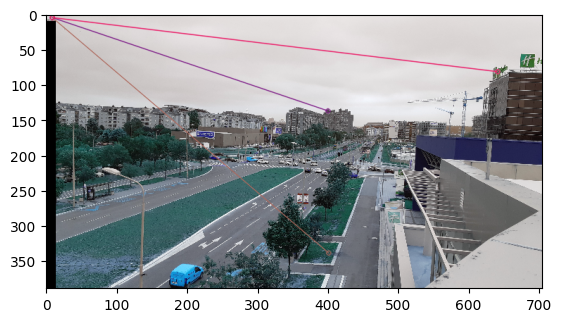

In [443]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
def match_sift(template, image, list_of_points=None): # [max_val, max_loc, i,0], neka vrati tačku koja ima max(len(matches)) NONE OPCIONI
    if list_of_points!=None and len(list_of_points)!=0:
        print("lista ima: ", len(list_of_points)," tacaka.")
        all_matches = [] 
        for point_info in list_of_points:
            th, tw, _ = template.shape
            template_resized=cv2.resize(template, (int(point_info[2]*tw),int(tw*point_info[2])), interpolation=cv2.INTER_AREA)
            image_cropped = image[point_info[1][1]:point_info[1][1]+int(th*point_info[2]), point_info[1][0]:point_info[1][0]+int(tw*point_info[2])]
            img1 = cv2.cvtColor(template_resized, cv2.COLOR_RGB2GRAY) #OK
            img2 = cv2.cvtColor(image_cropped, cv2.COLOR_RGB2GRAY) # radimo matching za template i za taj image odsečak
        #print(type(img1), type(img2))
            sift = cv.SIFT_create() # SIFT = Scale Invariant Feature Tranform
            kp1, des1 = sift.detectAndCompute(img1,None) 
            kp2, des2 = sift.detectAndCompute(img2,None)
            print(type(des1), type(des2))
        #des1 = des1.astype(np.float32)
        #des2 = des2.astype(np.float32)
            if des1 is None or des2 is None:
                continue
            else:
                bf = cv.BFMatcher()
                matches = bf.knnMatch(des1,des2,k=2)
        # Apply ratio test
                good = []
                if matches: #all([matches[0], matches[1]]): 
                    for match in matches:
                        if len(match) == 2:  # Ensure match has two values
                            m, n = match
                            if m.distance < 0.7 * n.distance:
                                good.append(m)
                    all_matches.append([point_info[0], point_info[1], point_info[2],len(good), len(matches)]) # šta ne valja - da se sortiraju po len(matches) zato što najveći teplate ima najveće matches
                    print("POINT INFO:", point_info)
        print(all_matches)
        return sorted(all_matches, key=lambda el:el[3],reverse=False)[0:3]#vrati tačku sa najviše matching poklapanja
    else:
        print("None points")
        #image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        #template = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)
        #image = cv2.bilateralFilter(image,4,75,75)
        #template = cv2.bilateralFilter(template,4,75,75)
        sift = cv2.SIFT_create()
        kp1, des1 = sift.detectAndCompute(template,None)
        kp2, des2 = sift.detectAndCompute(image,None)
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1,des2,k=2)
        good_matches = []
        for m, n in matches:
            if m.distance < 0.015 * n.distance:
                good_matches.append(m)
        
        #Extrakcija matched keypoints-a:
        # source = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
        # destination = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)
        # 
        # #est affine transformation
        # M, mask = cv2.estimateAffinePartial2D(source,destination)
        # 
        # #transformaciju primeniti na templ. cornere
        # h,w = template.shape[0:2]
        # corners = np.float32([[0,0], [0,h],[w,h], [w,0]]).reshape(-1,1,2)
        # transformed_corners = cv2.transform(corners, M)
        # # Calculate bounding box of transformed corners
        # min_x = np.min(transformed_corners[:, :, 0])
        # max_x = np.max(transformed_corners[:, :, 0])
        # min_y = np.min(transformed_corners[:, :, 1])
        # max_y = np.max(transformed_corners[:, :, 1])
        # cropped_template = image[int(min_y):int(max_y), int(min_x):int(max_x)]
        # cv2.imshow(cropped_template)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        
        img3 = cv.drawMatchesKnn(template,kp1,image,kp2,sorted(matches, key=lambda el:abs(el[0].distance-el[1].distance),reverse=True),None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        
        plt.imshow(img3)
        plt.show()  
        return 
        
        
        
    #img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    #plt.imshow(img3)
    #plt.show()  
hram2 = cv2.resize(cv2.imread('experiment/hram2.jpg'),None,fx=0.15, fy=0.15)
slika1 = cv2.resize(cv2.imread('slike1/image1.jpg'), None,fx= 0.15, fy=0.15)
match_sift(hram2,slika1)

In [230]:
def read_raw_picture(path):
    import rawpy
    import imageio
    #from matplotlib.pyplot import imshow
    #path = r'C:\Users\Korisnik\original_fajl\FON\1_Semafor_Super_Vero\108MP_Mi10Pro_RAW_1_SuperVero_oblacno.dng' 
    with  rawpy.imread(path) as raw:
        rgb = raw.postprocess()
    return cv2.cvtColor(rgb,cv2.COLOR_RGB2BGR)
def is_raw(path_to_picture):
    if path_to_picture.split('.')[1] == 'dng':
        return read_raw_picture(path_to_picture)
    else:
        return cv2.imread(path_to_picture)

(< cv2.DMatch 000001C583E60FB0>,)
(< cv2.DMatch 000001C583E61190>,)
(< cv2.DMatch 000001C583E60E10>,)
(< cv2.DMatch 000001C583E60DD0>,)
(< cv2.DMatch 000001C583E60430>,)
(< cv2.DMatch 000001C583E631B0>,)
(< cv2.DMatch 000001C583E61010>,)
(< cv2.DMatch 000001C583E61B50>,)
(< cv2.DMatch 000001C583E61110>,)
(< cv2.DMatch 000001C583E63650>,)
(< cv2.DMatch 000001C583E63670>,)
(< cv2.DMatch 000001C583E60F90>,)
(< cv2.DMatch 000001C583E60D50>,)
(< cv2.DMatch 000001C583E61030>,)
(< cv2.DMatch 000001C583E62730>,)
(< cv2.DMatch 000001C583E61810>,)
(< cv2.DMatch 000001C583E60D70>,)
(< cv2.DMatch 000001C583E62750>,)
(< cv2.DMatch 000001C583E60DB0>,)
(< cv2.DMatch 000001C583E60E50>,)
(< cv2.DMatch 000001C583E62D90>,)
(< cv2.DMatch 000001C583E63630>,)
(< cv2.DMatch 000001C583E63AB0>,)
(< cv2.DMatch 000001C583E60A10>,)
(< cv2.DMatch 000001C583E62A30>,)
(< cv2.DMatch 000001C583E633B0>,)
(< cv2.DMatch 000001C583E63490>,)
(< cv2.DMatch 000001C583E63AD0>,)
(< cv2.DMatch 000001C583E62C10>,)
(< cv2.DMatch 

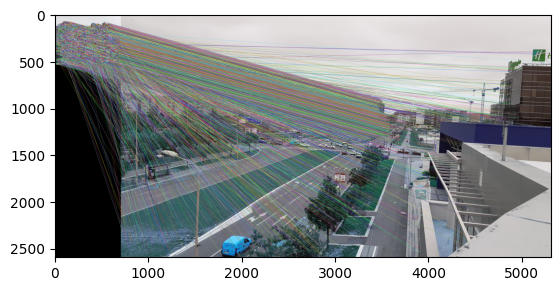

In [37]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
template = cv2.resize(cv2.imread('experiment/zgrade.jpg'),None,fx=1,fy=1)
image = cv2.resize(cv2.imread('slike1/image1.jpg'),None,fx=1, fy=1)
sift = cv2.SIFT_create()
k1, d1 = sift.detectAndCompute(template,None)
k2, d2 = sift.detectAndCompute(image,None)
bfm = cv2.BFMatcher()
matches = bfm.knnMatch(d1,d2,k=1)
for match in matches:
    print(match)
img_draw = cv2.drawMatchesKnn(template,k1,image,k2,matches,None,flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# cv2.imshow('res',cv2.resize(img_draw,None,fx=0.3,fy=0.3))
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# plt.imshow(img_draw)
# plt.show()

In [15]:
from skimage.exposure import cumulative_distribution # kalkulacija cumulative pixel value
import numpy as np #reshape an image
import matplotlib.pyplot as plt # plot the result
from skimage.io import imread 

In [168]:
image = (imread('output_0.3299380804953561.jpg', as_gray=True) * 255).astype(np.uint8)
imageTemplate = (imread('template.jpg',as_gray=True)*255).astype(np.uint8)
#as gray čita normalizovanu grayscale varijantu, pa je mi vraćamo u opseg 0-255 i od float32 pretvaramo u uint8

In [158]:
templ_on_image = (imread('output_0.3299380804953561.jpg', as_gray=True)*255).astype(np.uint8)

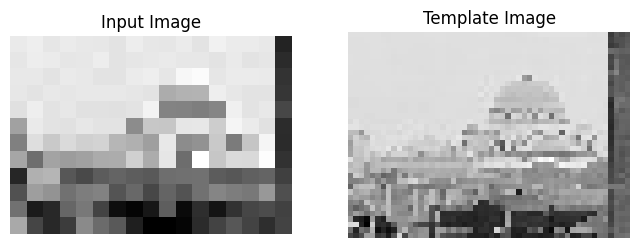

In [169]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.title('Input Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Template Image')
plt.imshow(imageTemplate, cmap='gray')
plt.axis('off')
plt.show()

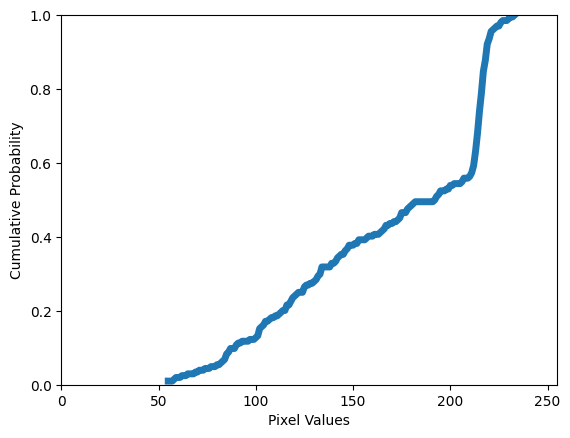

In [170]:
# compute the cumulative distribution of input image
cdfImageInput, binsImageInput = cumulative_distribution(image)
# pixel_values - pixel values of input image, cumulative_probabilities - corresponding cumulative probabilities of pixel values 
plt.plot(binsImageInput, cdfImageInput, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.show() # ovo je slika neba - zato pixeli imaju visoke vrednosti. Na početku ose postoje empty pixel values - koji nemaju nikakve vrednosti, kao i na kraju intervala

In [171]:
# check the first and last bins and probability
print(f"First bins: {binsImageInput[0]}, Cumulative Probability: {cdfImageInput[0]:.5f}") # prvi pixel je vrednosti 215
print(f"Last bins: {binsImageInput[-1]}, CUmulative Probability: {cdfImageInput[0]:.5f}") # poslednji pixel je vrednosti 227
# na slici ne postoje pixeli koji imaju vrednost manju od 215 i vecu od 227

First bins: 55, Cumulative Probability: 0.00980
Last bins: 233, CUmulative Probability: 0.00980


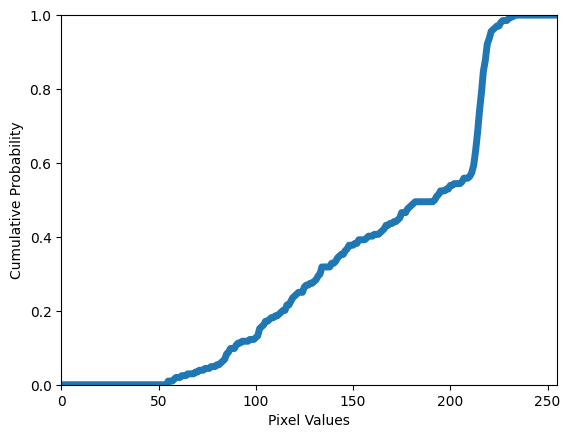

In [172]:
# na tim mestima, pixel<215 i pixel>227 potrebno je da napunimo cumulativnu raspodelu vrednostima 0 za indexe 0-215ć
# pad the begining and ending pixel values
cdfImageInput = np.insert(cdfImageInput, 0, [0]*binsImageInput[0]) # fill 0 in index 0 - 215
cdfImageInput = np.append(cdfImageInput, [1]*(255-binsImageInput[-1])) # fill 1 in index 247 - 255

plt.plot(cdfImageInput, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.show()

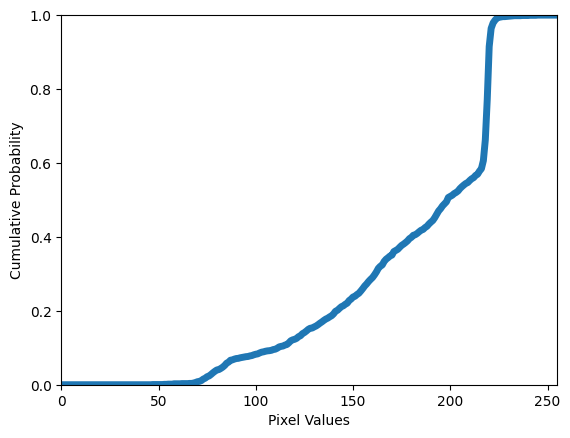

In [173]:
# compute the cumulative distribution of image template
# ISTA PROCEDURA I ZA TEMPLATE SLIKU
cdfImageTemplate, binsImageTemplate = cumulative_distribution(imageTemplate)

cdfImageTemplate = np.insert(cdfImageTemplate, 0, [0]*binsImageTemplate[0])
cdfImageTemplate = np.append(cdfImageTemplate, [1]*(255-binsImageTemplate[-1]))

plt.plot(cdfImageTemplate, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.show()

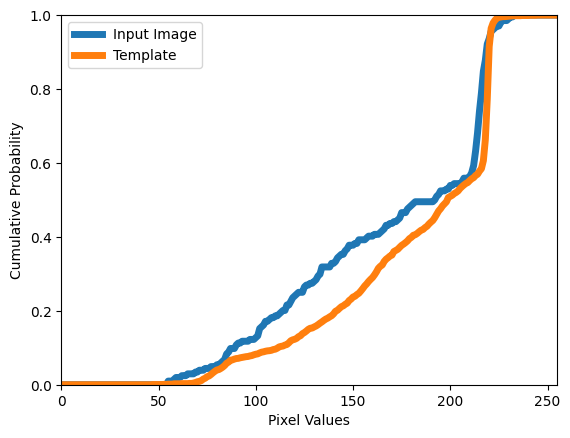

In [174]:
# PREGLED FUNKCIJA KUMULATIVNE DISTRIBUCIJE ZA IMAGE I ZA TEMPLATE
plt.plot(cdfImageInput, linewidth=5, label='Input Image')
plt.plot(cdfImageTemplate, linewidth=5, label='Template')
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [175]:
#HISTOGRAM MATCHING:
# Create an array of pixel values
pixels = np.arange(256)
pixels

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

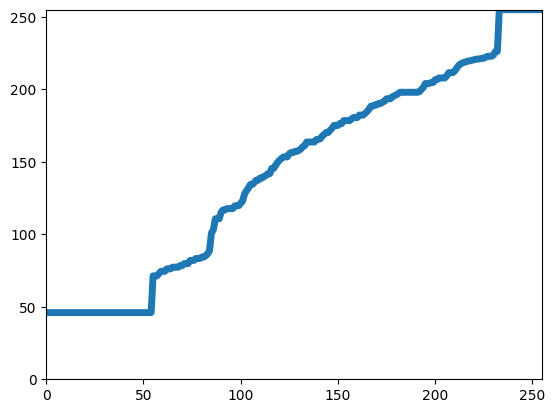

In [176]:
new_pixels = np.interp(cdfImageInput, cdfImageTemplate, pixels) # zatim interpolacija kumulativne verovatnoće za image template u kumulativne verovatnoće input slike
plt.plot(new_pixels, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,255)
plt.show()

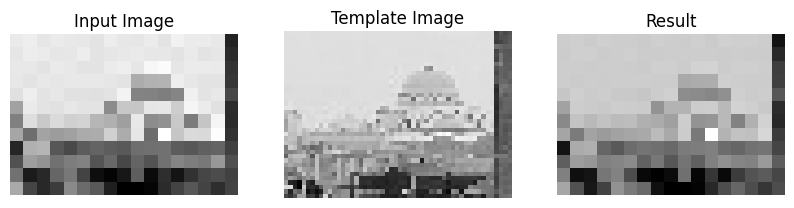

In [177]:
# Map and Reshape to 2D array
imageOut = (np.reshape(new_pixels[image.ravel()], image.shape)).astype(np.uint8)
# Preview the result
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
plt.title('Input Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Template Image')
plt.imshow(imageTemplate, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Result')
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()

In [13]:
# get the CDF

def getCDF(image):
    cdf, bins = cumulative_distribution(image)
    cdf = np.insert(cdf, 0, [0]*bins[0])
    cdf = np.append(cdf, [1]*(255-bins[-1]))
    return cdf

# histogram matching
def histMatch(cdfInput, cdfTemplate, imageInput):
    pixelValues = np.arange(256)
    new_pixels = np.interp(cdfInput, cdfTemplate, pixels)
    imageMatch = (np.reshape(new_pixels[imageInput.ravel()], imageInput.shape)).astype(np.uint8)
    return imageMatch

# Preview the result
def plotResult(imInput, imTemplate, imResult):
    plt.figure(figsize=(10,7))
    plt.subplot(1,3,1)
    plt.title('Input Image')
    plt.imshow(imInput, cmap='gray')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.title('Template Image')
    plt.imshow(imTemplate, cmap='gray')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.title('Result')
    plt.imshow(imResult, cmap='gray')
    plt.axis('off')
    plt.show()

# read/load the input and template image
# image = (imread('output_0.3299380804953561.jpg', as_gray=True)*255).astype(np.uint8)
# imageTemplate = (imread('template.jpg', as_gray=True)*255).astype(np.uint8)
# 
# # compute the CDF
# cdfInput = getCDF(image)
# cdfTemplate = getCDF(imageTemplate)
# imageResult = histMatch(cdfInput, cdfTemplate, image)
# 
# # plot 
# plotResult(image, imageTemplate, imageResult)


In [17]:
import numpy as np 
def correlation_coefficient(cdf1, cdf2):
    return np.corrcoef(cdf1,cdf2)[0,1]

In [706]:
image1 = [(imread('slike1/image1.jpg', as_gray=True)*255).astype(np.uint8), (0,0),1]
image2 = [(imread('image0.7493699789047241.jpg', as_gray=True)*255).astype(np.uint8), (1,1),2]
image3 = [(imread('image0.8061572313308716.jpg', as_gray=True)*255).astype(np.uint8), (2,2),2]
image4 = [(imread('image0.8260781168937683.jpg', as_gray=True)*255).astype(np.uint8), (3,3),4]
image5 = [(imread('image0.8462672233581543.jpg', as_gray=True)*255).astype(np.uint8), (3,3),4]

images = [image1, image2, image3, image4,image5] 

#images = [image1]
imageTemplate = (imread('template.jpg', as_gray=True)*255).astype(np.uint8)


best_coord = erase_false_positives(images, imageTemplate) 
print(best_coord)

# cdf1 = getCDF(image1) # trebalo bi da je najbolji, tj. najveći!!!
# cdf2 = getCDF(image2)
# cdf3 = getCDF(image3)
# cdf4 = getCDF(image4)
# 
# cdf_template = getCDF(imageTemplate)
# 
# cc1 = correlation_coefficient(cdf1,cdf_template)
# cc2 = correlation_coefficient(cdf2,cdf_template)
# cc3 = correlation_coefficient(cdf3,cdf_template)
# cc4 = correlation_coefficient(cdf4,cdf_template)
# 
# print(cc1) # i jeste, hvala bogu, ali samo za 0.03 haha
# print(cc2)
# print(cc3)
# print(cc4)
# 
# #print(type(cdf1))
# #print(cdf1)
# print(type(image1[0][0])) 

FileNotFoundError: No such file: 'C:\Users\Korisnik\DataspellProjects\Deep_Learning\Invariant-TemplateMatching\image0.7493699789047241.jpg'

In [18]:
def jensen_shannon_divergence(cdf1, cdf2):
    eps = 1e-10  # small epsilon value to prevent division by zero
    m = 0.5 * (cdf1 + cdf2)
    return 0.5 * (np.sum(cdf1 * np.log2((cdf1 + eps) / (m + eps))) + np.sum(cdf2 * np.log2((cdf2 + eps) / (m + eps))))

def chi_square_distance(cdf1, cdf2):
    return np.sum((cdf1 - cdf2)**2 / (cdf1 + cdf2 + 1e-10))
def ks_statistic(cdf1, cdf2):
    from scipy.stats import ks_2samp
    return ks_2samp(cdf1, cdf2)[0] # manja bolja 

In [304]:
def erase_false_positives(image, template): # neka je images = [ndarray numpy.uint8 vrednosti, (x,y)]
    from collections import defaultdict
    from operator import itemgetter 
    cdf_template = getCDF(template)
    pixels_ndarray = image[0]
    top_left_coord = image[1]
    scaling_info = image[2]
    metric = image[3]          #[top_left_coord, correlation, jsd, hsd, scaling] 
    pixels_ndarray = cv2.resize(pixels_ndarray, (template.shape[1], template.shape[0]), interpolation=cv2.INTER_AREA) 
    cdf_image = getCDF(pixels_ndarray)
    
    
    #cv2.imwrite(f"explore/templates/template{metric}.png",template)
    #cv2.imwrite(f"explore/images/original{metric}.png",pixels_ndarray)
    # cv2.imshow("template",template)
    # cv2.imshow(f"image part with matching {metric}", pixels_ndarray)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    correlation = correlation_coefficient(cdf_template,cdf_image)
        #correlations[top_left_coord] = [correlation, scaling_info]
        #print(sorted(correlations.items(), key=itemgetter(1), reverse=True))
    jsd = jensen_shannon_divergence(cdf_template,cdf_image)
    hsd = chi_square_distance(cdf_template,cdf_image)
    kss = ks_statistic(cdf_template, cdf_image)
    #correlations[top_left_coord] = [correlation, scaling_info,jsd, hsd]
    #print(" Za sliku sa gornjim levim uglom",top_left_coord," correlacija je: ",correlations[top_left_coord])
    #print(" Za tačku",top_left_coord," Jensen Šanonova divergenca je:",jsd) #sto manja, to bolje npr, 0
    #print(" Za tačku",top_left_coord,"Hi kvadrat razlika je:",hsd) # sto manje, to bolje npr. najbolje 0 -^2 kaznjava jos
    #print("SORITRANA LISTA PO METRICI JENSEN ŠANONOVA DIVERGENCA")
    #print(sorted(correlations.items(), key=lambda x:x[1][2], reverse=False))
    return [top_left_coord, correlation, jsd, hsd, scaling_info,kss,metric]

In [688]:
# POKUŠAČEMO DA NA ZGRADE PRIMENIMO SOBEL OPERATOR.
# SOBEL OPERATOR: 
def ret_thresh(t_crop,image):
    sobel_x = cv2.Sobel(src=t_crop, ddepth=cv2.CV_32F,dx=1,dy=0,ksize=3)
    sobel_y = cv2.Sobel(src=t_crop,ddepth=cv2.CV_32F, dx=0,dy=1,ksize=3)
    combine = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y, beta=0.5, gamma=0)
    ret, thrs = cv2.threshold(src=combine,thresh=20, maxval=255, type=cv2.THRESH_BINARY)

    sobel_x_i = cv2.Sobel(src=image, ddepth=cv2.CV_32F,dx=1,dy=0,ksize=3)
    sobel_y_i = cv2.Sobel(src=image,ddepth=cv2.CV_32F, dx=0,dy=1,ksize=3)
    combine_i = cv2.addWeighted(src1=sobel_x_i, alpha=0.5, src2=sobel_y_i, beta=0.5, gamma=0)
    ret_i, thrs_i = cv2.threshold(src=combine_i,thresh=20, maxval=255, type=cv2.THRESH_BINARY)
    return (thrs,thrs_i)

In [280]:
crop = cv2.imread('template.jpg',cv2.IMREAD_GRAYSCALE)#cv2.IMREAD_GRAYSCALE
img = cv2.imread('slike1/image1.jpg',cv2.IMREAD_GRAYSCALE)
crop_resized = cv2.resize(crop,None,fx=0.3,fy=0.3)
img_resized = cv2.resize(img,None,fx=0.15,fy=0.15)
# cv2.imshow('crop',crop_resized)
# cv2.imshow('img',img_resized)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
tt = get_sharpen_image(crop_resized) 
ti = get_sharpen_image(img_resized)
res = cv2.matchTemplate(img_resized,tt,cv2.TM_CCOEFF_NORMED)
#results = np.where(res>=0.4)
_, max_val, _, max_loc = cv2.minMaxLoc(res)
#print(max_val)
#print(len(results))
#for max_loc in results:
#print(max_loc)
cv2.rectangle(img_resized,(max_loc),(max_loc[0]+crop_resized.shape[1],max_loc[1]+crop_resized.shape[0]),(0,255,0),2)
print(max_val,max_loc)
cv2.imshow('matrix',res)
cv2.imshow('crop',cv2.resize(tt,None,fx=4,fy=4))
cv2.imshow('img',ti)
cv2.imshow('result',img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 0.2882708013057709 (327, 142) - zgrada sa ovim kernelom i duplo vecim templateom od imagea za ovaj odnos ima ovaj ccoeff_normed. Hajde da pokusamo da poboljsamo ovo. Sledeca celija

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [526]:
crop = cv2.imread('template.jpg',cv2.IMREAD_GRAYSCALE)#cv2.IMREAD_GRAYSCALE
img = cv2.imread('slike1/image1.jpg',cv2.IMREAD_GRAYSCALE)
crop_resized = cv2.resize(crop,None,fx=0.3,fy=0.3)
img_resized = cv2.resize(img,None,fx=0.15,fy=0.15)
# cv2.imshow('crop',crop_resized)
# cv2.imshow('img',img_resized)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
tt = get_sharpen_image(crop_resized)
ti = get_sharpen_image(img_resized)
ti = cv2.bilateralFilter(ti, d=9, sigmaColor=100, sigmaSpace=100) #75, 75
tt  = cv2.bilateralFilter(tt, d=9, sigmaColor=100, sigmaSpace=100) # 0.30219346284866333 (327, 142)
#0.3155978322029114 (327, 142)


res = cv2.matchTemplate(img_resized,tt,cv2.TM_CCOEFF_NORMED)
#results = np.where(res>=0.4)
_, max_val, _, max_loc = cv2.minMaxLoc(res)
#print(max_val)
#print(len(results))
#for max_loc in results:
#print(max_loc)
cv2.rectangle(img_resized,(max_loc),(max_loc[0]+crop_resized.shape[1],max_loc[1]+crop_resized.shape[0]),(0,255,0),2)
print(max_val,max_loc)
cv2.imshow('matrix',res)
cv2.imshow('crop',cv2.resize(tt,None,fx=4,fy=4))
cv2.imshow('img',ti)
cv2.imshow('result',img_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

0.3155978322029114 (327, 142)


In [469]:
#crop = cv2.imread('template.jpg',cv2.IMREAD_GRAYSCALE)
def get_sharpen_image(image):
    #crop_resized = cv2.resize(crop,None,fx=4.5,fy=4.5)
    sharpen_kernel = np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]], 
        dtype=np.float32)
    sharpen_img = cv2.filter2D(src=image,ddepth=-1,kernel=sharpen_kernel)
    return sharpen_img
#cv2.imshow("Original",crop_resized)
#cv2.imshow("Sharpen", sharpen_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [500]:
def apply_blur_kernel(image):
    import numpy as np
    blur_kernel = np.ones((3,3))*1/(3*3) 
    #return cv2.filter2D(src=image,ddepth=-1,kernel=blur_kernel)
    return cv2.GaussianBlur(image, (3,3), 0)

In [504]:
for_blur = cv2.imread('template.jpg',cv2.IMREAD_GRAYSCALE)
for_blur = cv2.resize(for_blur,None,fx=1,fy=1)
for_blur = apply_blur_kernel(for_blur)

kernel1 = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
], dtype=np.float32)  


result_A = cv2.filter2D(src=for_blur,ddepth=-1, kernel=kernel1)


kernel2 = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]
                    ],dtype=np.float32)

result_B = cv2.filter2D(src=for_blur,ddepth=-1, kernel=kernel2)

res_picture_color = np.zeros_like(result_A) #***
for y in range(result_A.shape[0]):
    for x in range(result_A.shape[1]):
        pow_value_image1 = result_A[y,x]*result_A[y,x]
        pow_value_image2 = result_B[y,x]*result_B[y,x]
        res_pix = np.sqrt(pow_value_image1+pow_value_image2)
        res_picture_color[y,x] = res_pix

cv2.imshow('Res A',result_A)
cv2.imshow('Res B', result_B)
cv2.imshow('res Color',res_picture_color)
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\Korisnik\AppData\Local\Temp\ipykernel_6884\3809254394.py:25: RuntimeWarning: overflow encountered in scalar multiply
  pow_value_image1 = result_A[y,x]*result_A[y,x]
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_6884\3809254394.py:26: RuntimeWarning: overflow encountered in scalar multiply
  pow_value_image2 = result_B[y,x]*result_B[y,x]
C:\Users\Korisnik\AppData\Local\Temp\ipykernel_6884\3809254394.py:27: RuntimeWarning: overflow encountered in scalar add
  res_pix = np.sqrt(pow_value_image1+pow_value_image2)


In [582]:
tmpl2 = cv2.imread('template1/template2.jpg')
tmpl2 = cv2.resize(tmpl2, None, fx=0.15, fy=0.15)
tmpl2_bil = cv2.bilateralFilter(tmpl2,9,75,75)
tmpl2_gaus = cv2.GaussianBlur(tmpl2,(5,5),0)
blur_kernel = np.ones((3,3))*1/(3*3)
blur_2d = cv2.filter2D(tmpl2,-1,blur_kernel)
cv2.imshow('bilateral', tmpl2_bil) #najbolji
cv2.imshow('gaus',tmpl2_gaus)
cv2.imshow('2d',blur_2d)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [597]:
def denoise_nlm(image):
    import cv2
    import numpy as np
    from skimage import io
    from skimage.restoration import denoise_nl_means, estimate_sigma
    img = image
    #img = io.imread('template1/template2.jpg', as_gray=True)#.astype(np.float32)
    sigma_est = np.mean(estimate_sigma(img,channel_axis=None))
    denoise_img = denoise_nl_means(img,h=1.*sigma_est,fast_mode=True, patch_size=5,patch_distance=3,channel_axis=None)

    cv2.imshow('slika',denoise_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return denoise_img 

In [124]:
slika =cv2.imread('template.jpg')

In [180]:
#slika.mean()
def create_mask(image, threshold):
    mask = np.zeros_like(image, dtype=np.uint8) #sve vece od npr. 220 setuje se na 0, a manje na 1
    mask[image <= threshold] = 255
    return mask #cv2.convertScaleAbs(mask)

In [181]:
# Example usage
input_image_path = "template.jpg"
#image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.imread(r'C:\Users\Korisnik\original_fajl\FON\2_Druga_raskrsnica_kod_buvljaka\12MP_A40_2_raskrsnica_oblacno.jpg')

# Set threshold for creating the mask
threshold = 220

# Create the mask
mask = create_mask(image, threshold)

# Display the mask
cv2.imshow("Mask", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [367]:
def apply_mask(image, mask):
    #mask = np.uint8(mask)
    #mask = cv2.resize(mask, (image.shape[1], image.shape[0]))
    #print(mask.shape,image.shape)
    #image = cv2.convertScaleAbs(image)
    #print("Maska dtype:",mask.dtype)
    #print("Image type: ",image.dtype)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    return masked_image

# Example usage
image = cv2.imread(r'C:\Users\Korisnik\original_fajl\FON\2_Druga_raskrsnica_kod_buvljaka\12MP_A40_2_raskrsnica_oblacno.jpg')
#hsv = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
mask = cv2.inRange(image,220,255)
masked_image = apply_mask(image, mask)
#print(mask.shape,image.shape)
# Display the masked image
cv2.imshow("Masked Image", masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(mask.shape, masked_image.shape)

(2592, 4608) (2592, 4608, 3)


In [3]:
def segment_picture(image_for_segment):
    
    #1. Grayscale varijanta gde je belom bonom obeleženo ono što želimo da prikažemo, a crnom ostatak
    gray = cv2.cvtColor(image_for_segment,cv2.COLOR_BGR2GRAY)
    
    _, tresh = cv2.threshold(gray,190,255, cv2.THRESH_BINARY_INV) # sve pixele izmedju 0 i 190 boji u belo, a iznad 190 boji u crno da bi ono što posmatramo bilo belo, a nebo crno!
    

    
    #2. PRONAĆI KONTURE:

    contours, hierarchy = cv2.findContours(tresh,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    #print("BROJ KONTURA: ", len(contours))

    #3. SORTIRATI KONTURE TAKO DA ONE NAJVEĆE BUDU PRVE U NIZU
    cnt = sorted(contours, key=cv2.contourArea)[-1]
    
    #print(image.shape)
    
    #4. KREIRANJE MASKE dimenzija originalne slike čiji je tip uint8, (389, 691, 3)

    mask = np.zeros(image.shape[0:2],dtype="uint8")


    #neutral_value = np.array([128,128,128], dtype=np.uint8) # MASKA SA NEUTRALIMA
    

    #maskedRed = cv2.drawContours(mask,[cnt],-1,(0,0,255),-1)
    #5. iscrtati konture u masku 
    
    maskedFinal = cv2.drawContours(mask,[cnt],-1,(255,255,255),-1)
    #maskedFinal  =normalize_mask(maskedFinal)
    
    
    #neutral_mask = cv2.bitwise_not(maskedFinal) # neutralna maska
    # MERGE ORIGINALNE SLIKE I NOVOKREIRANE MASKE
    #neutral_mask = normalize_mask(neutral_mask)
    
    finalImage = cv2.bitwise_and(image,image,mask=maskedFinal)
    print("FINAL:",finalImage[20:200,20:200]) # celobrojne vrednosti 1-190, a 190+ zamenjene su 0 - najtamnije
    print(type(finalImage)) # ndarray
    print(type(finalImage[0][0][1])) #uint8
    print(finalImage.shape) # povratak je tri kanala
    #finalImage += cv2.bitwise_and(np.full_like(image, neutral_value), np.full_like(image, neutral_value), mask=neutral_mask)
    # cv2.imshow("Maska",maskedFinal) # sve crno, a ono sto je u boji je belo na masci tj. pixeli 0-190
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    return finalImage, maskedFinal

In [740]:
image= cv2.imread('template2/folder2template1.png')
image = cv2.resize(image,None,fx=0.15,fy=0.15)
image_with_mask,mask = segment_picture(image)

cv2.imshow('Mask',mask)
cv2.imshow("Template res",image_with_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

FINAL: [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[ 40  51  43]
  [ 20  27  22]
  [ 25  36  28]
  ...
  [ 43  49  44]
  [ 46  50  44]
  [ 62  64  57]]

 [[ 38  49  41]
  [ 34  41  36]
  [ 41  49  42]
  ...
  [ 53  56  54]
  [ 22  23  19]
  [165 167 158]]

 [[ 40  50  42]
  [ 34  40  35]
  [ 33  41  34]
  ...
  [166 177 175]
  [ 38  37  36]
  [155 154 146]]]
<class 'numpy.ndarray'>
<class 'numpy.uint8'>
(367, 490, 3)


In [667]:
# npr. ako je slika jako svetla neka ne pravi maske ili setuj granicu maske na visi level
# 1. sve hoce sa 210 granicom maske osim hrama i one zgrade iza
# 2. ali zgrada i hram? mozda da ih popnemo na 220 jer se na 220 bas lepo vide i jedno i drugo. 
def normalize_mask(mask):
    # Convert the mask to floating point to ensure division works properly
    mask_float = mask.astype(np.float32)

    # Find the maximum and minimum values in the mask
    max_value = np.max(mask_float)
    min_value = np.min(mask_float)

    # Normalize the mask to the range [0, 1]
    normalized_mask = (mask_float - min_value) / (max_value - min_value)*255
    normalized_mask_uint8 = normalized_mask.astype(np.uint8)
    return normalized_mask_uint8 

In [358]:
import cv2
import numpy as np
from pathlib import Path 

result_dict = dict()
final_points_locals = []
#img=read_raw_picture('slike2/folder4image7.dng')
img = cv2.imread('slike2/folder2image5.png')
#result_dict['image'] = 'slike2/folder1image1.png'
#img = cv2.imread('slike1/image1.jpg')
img_res = cv2.resize(img, None, fx=0.15, fy=0.15)
image_for_sift = img_res
templ = cv2.imread('template2/folder2template5.png')
#templ = cv2.imread('template2/folder4template7.png')
result_dict['template'] = 'template2/folder2template3.png'
print("MEAN GRAYSCALE:",cv2.mean(cv2.cvtColor(templ, cv2.COLOR_BGR2GRAY)))
#templ = cv2.resize(templ,None,fx=0.05, fy=0.05)
templ = cv2.resize(templ,None,fx=0.15, fy=0.15)
templ_show = templ
templ = template_crop(templ)
cv2.imwrite('template.jpg',templ)
template_for_cdf = templ
template_for_sift = templ
hi, wi,_ = img_res.shape
ht, wt, _ = templ.shape
h_ratio = hi/ht
w_ratio = wi/wt
if h_ratio > w_ratio:
    percent = w_ratio
else:
    percent = h_ratio
print(f"Template sme da se povećava do {percent*100}% svoje originalne veličine.")
num_intervals = int(percent/0.1)
intervals = split_interval(0.04, percent,num_intervals) #start, end, korak #0.04 ranije
print("Broj intervala: ",num_intervals)
print("PERCENT",percent)
for interval in intervals:
    points = get_best_local_match_with_mask(img_res,templ,interval[0],interval[1],percent)
    if(len(points)!=0):
        for point in points:
            final_points_locals.append(point)
    else:
        continue


color_filtered_list = []
template_channels = cv2.mean(templ)
template_channels = np.array([template_channels[0], template_channels[1], template_channels[2]])
for point_info in final_points_locals: #points_list:
    point = point_info[1]
    cropped_img = img_res[point[1]:point[1]+int(ht*point_info[2]), point[0]:point[0]+int(wt*point_info[2])]
    cropped_channels = cv2.mean(cropped_img)
    cropped_channels = np.array([cropped_channels[0], cropped_channels[1], cropped_channels[2]])
    diff_observation = cropped_channels - template_channels
    total_diff = np.sum(np.absolute(diff_observation))
    result_dict['RGB_difference'] = total_diff
    if total_diff < 200:
        print("DIFERENCIJAL TEMPLATE-IMAGE:",total_diff, "TACKA: ",point_info)
        color_filtered_list.append([point_info[0],point_info[1],point_info[2]])
print("SVE TACKE: ",color_filtered_list)

images = []
upper_lefts = []
print("COLOR FILTERED LIST:",len(color_filtered_list))
hm_list = []
for best_match in color_filtered_list:#best_sift_point:
    rec_w, rec_h = best_match[1] # coords of upper left corner
    pixels = img_res[rec_h:rec_h+int(ht*best_match[2]), rec_w:rec_w+int(best_match[2]*wt)] # [max_val, max_loc, i,0]
    template_cdf = cv2.resize(template_for_cdf, (int(best_match[2]*wt)+1,int(best_match[2]*ht)+1), interpolation=cv2.INTER_AREA) # ŠALJE SE RESIZE TEMPLATE-A A NE ORIGINALA!!!
    image_for_cdf = [pixels, (rec_w, rec_h), best_match[2], best_match[0]]
    # OVDE TREBA DA IDE KUMULATIVNA DISTRIBUCIJA ZA SLIKA - TEMPLATE PAR
    best_upper_left = erase_false_positives(image_for_cdf,template_cdf)
    #[top_left_coord, correlation, jsd, hsd, scaling] 
    upper_lefts.append(best_upper_left)

print(sorted(upper_lefts, key=lambda x:0.5*x[1]+0.5*x[6], reverse=True))
#print(sorted(upper_lefts, key=lambda x:x[2], reverse=False))
#print("REZ HISTOGRAMA:",best_upper_left) 
if len(upper_lefts)!=0:  # [top_left_coord, correlation, jsd, hsd, scaling_info,kss,metric]
    best_points = sorted(upper_lefts, key=lambda x:0.5*x[1]+0.5*x[6], reverse=True)[0:10] 
    
    #best_points_histogram = sorted(hm_list,key=lambda el:el[1], reverse=False)[0:10]
    #print("BEST POINTS HISTOGRAM:", best_points_histogram)
    
    euclideans=[]
    # mean eucl. distance space - for those points. 
    for point in best_points: 
        # za tu tacku iz best_points izracunati atribut mean euqlidian distance
        width, height = point[0]
        scale = point[4]

        pixels_t = img_res[height:height+int(ht*scale), width:width+int(scale*wt)] # [max_val, max_loc, i,0]
        template_t = cv2.resize(template_for_cdf,(pixels_t.shape[1], pixels_t.shape[0]),interpolation=cv2.INTER_AREA)
        # cv2.imshow('img',pixels_t)
        # cv2.imshow('templ',template_t)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        mean_ed = mean_euclidean_dist(pixels_t, template_t)
        print(mean_ed)
        euclideans.append([point[0], point[1], point[2], point[3], point[4], point[5], point[6], mean_ed])
    print(euclideans)
    for best_point in sorted(euclideans, key=lambda el:el[7], reverse=False)[0:2]:
        # result_dict['top_left'] = best_point[0]
        # result_dict['correlation'] = best_point[1]
        # result_dict['jsd'] = best_point[2]
        # result_dict['hsd'] = best_point[3]
        # result_dict['scaling'] = best_point[4]
        # result_dict['template_name'] = 'bele zgrade'
        #write_results([result_dict],Path.cwd()/'data/results.csv', result_dict.keys())
        print(best_point)
        best_w, best_h = best_point[0]
        #best_scaling = best_point[2]
        best_scaling = best_point[4] #................[correlation, scaling_info,jsd, hsd]
        cv2.rectangle(img_res,(best_w,best_h),(best_w+int(wt*best_scaling), best_h+int(ht*best_scaling)), (0,255,0),2)
        #print(best_point)
    print("---------------------------------------------------------------------------------------")
    print(best_points)
    cv2.imshow("Result",img_res)
    cv2.imshow("Template", templ_show)
    cv2.waitKey(0)
    cv2.destroyAllWindows()    # (305, 156), 0.33 scale za Vero na prvom templ

MEAN GRAYSCALE: (155.88165659848346, 0.0, 0.0, 0.0)
Template sme da se povećava do 1003.4482758620691% svoje originalne veličine.
Broj intervala:  100
PERCENT 10.03448275862069
Image shape (582, 778, 3) templ shape (58, 64, 3)
Image shape (582, 778, 3) templ shape (58, 64, 3)
Gotov resize oba
MAXVAL: 0.9840399622917175, MAX LOC (758, 233) SCALE:0.04
Gotov resize oba
MAXVAL: 0.9439728856086731, MAX LOC (757, 233) SCALE:0.05
Gotov resize oba
MAXVAL: 0.924000084400177, MAX LOC (466, 103) SCALE:0.060000000000000005
Gotov resize oba
MAXVAL: 0.9040272235870361, MAX LOC (249, 255) SCALE:0.07
Gotov resize oba
MAXVAL: 0.9274652600288391, MAX LOC (248, 255) SCALE:0.08000000000000002
Gotov resize oba
MAXVAL: 0.909230649471283, MAX LOC (247, 255) SCALE:0.09000000000000001
Gotov resize oba
MAXVAL: 0.9255983233451843, MAX LOC (247, 255) SCALE:0.1
Gotov resize oba
MAXVAL: 0.9416032433509827, MAX LOC (246, 254) SCALE:0.11000000000000001
Gotov resize oba
MAXVAL: 0.9416032433509827, MAX LOC (246, 254) S

In [213]:
def get_best_local_match_with_mask(img_res,templ,lower_scale,upper_scale,percent):
    #PNGs + squere difference
    final_points = []
    hi, wi,_ = img_res.shape
    ht, wt, _ = templ.shape
    print("Image shape",img_res.shape,"templ shape",templ.shape)
    #templ = cv2.cvtColor(templ, cv2.COLOR_BGR2GRAY)   # prvo je isao bgr2rgb
    #img_res = cv2.cvtColor(img_res, cv2.COLOR_BGR2GRAY)  # znaci usao si u jebenu for petlju i menjao grayscale sliku u jedan kanal sto puta prolazeci kroz istu 
    #img_res,_ = segment_picture(img_res)
    #templ,_ = segment_picture(templ)
    img_res = cv2.bilateralFilter(img_res,d=9,sigmaColor=75,sigmaSpace=75)
    templ = cv2.bilateralFilter(templ,d=9,sigmaColor=75,sigmaSpace=75)
    print("Image shape",img_res.shape,"templ shape",templ.shape)

    for i in np.arange(lower_scale,upper_scale,0.01):
        new_width = int(wt * i)
        new_height = int(ht* i)
        if new_height == 0:
            new_height = 1
        if new_width == 0:
            new_width = 1

        if percent>2.0:  
            templ = cv2.resize(templ, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
        else:
            templ = cv2.resize(templ, (new_width, new_height), interpolation=cv2.INTER_AREA)
        # templ = cv2.cvtColor(templ, cv2.COLOR_BGR2GRAY)   # prvo je isao bgr2rgb
        # img = cv2.cvtColor(img_res, cv2.COLOR_BGR2GRAY)
        
        print("Gotov resize oba")
        # _, tresh = cv2.threshold(templ,190,255,cv2.THRESH_BINARY_INV)
        # cnt, hier = cv2.findContours(tresh, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
        # contours = sorted(cnt, key=cv2.contourArea)[-1]
        # mask = np.zeros(templ.shape[0:2],dtype="uint8")
        # maskedFinal = cv2.drawContours(mask, [contours],-1,(255,255,255),-1)
        # cv2.imshow("MASKA",maskedFinal)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        
        # print("MASKA FINAL:",maskedFinal)
        # print("MASKED FINAL TYPE: ",type(maskedFinal))
        # print("MASKED FINAL ELEMENT TYPE:", type(maskedFinal[0][0]))
        #templ = cv2.bilateralFilter(templ,d=9,sigmaSpace=75,sigmaColor=75)

        result_matrix = cv2.matchTemplate(img_res,templ, method=cv2.TM_CCOEFF_NORMED)
        # cv2.imshow("Img za matr ccoeff",img_res)
        # cv2.imshow("Templ", templ)
        # cv2.waitKey(0)
        #cv2.destroyAllWindows()
        min_val, max_val, min_loc ,max_loc = cv2.minMaxLoc(result_matrix)
        print(f"MAXVAL: {max_val}, MAX LOC",max_loc,f"SCALE:{i}")
        if 0.5<max_val:
            final_points.append([max_val, max_loc, i,0])
    return final_points

In [180]:
import cv2 
#    image_for_cdf = [pixels, (rec_w, rec_h), best_match[2], best_match[0]]
#    template_for_cdf = pikseli
# cdf_template = getCDF(template)
# pixels_ndarray = image[0]
# top_left_coord = image[1]
# scaling_info = image[2]
# metric = image[3]

def histogram_intersection(hist_1, hist_2):
    minima = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
    return intersection
    
def histogram_matching(template_task, image_task):
   
    pixels = image_task[0]
    top_left = image_task[1]
    scaling_info = image_task[2]
    metric = image_task[3]

    template_task = cv2.resize(template_task,(pixels.shape[1],pixels.shape[0]), interpolation=cv2.INTER_AREA)
    cv2.imwrite(f"explore/images/image{metric}.png",pixels)
    cv2.imwrite(f"explore/templates/template{metric}.png",template_task)
    images = [pixels] # pixeli ulaze u listu. Ovo ostalo se samo vraca
    templates = [template_task] 
 
    if images is None or templates is None:
        print("Could not open or find the images!")
        exit(0)
    for image, template in zip(images, templates):
        # image = cv2.GaussianBlur(image,(3,3),0)
        # template = cv2.GaussianBlur(template,(3,3),0)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        template = cv2.cvtColor(template, cv2.COLOR_BGR2HSV)
        # template = cv2.resize(template,(image.shape[1],image.shape[0]), interpolation=cv2.INTER_AREA)
    
        h_bins = 50 # hue channel biće podeljen u 50 kanti 
        s_bins = 60 # saturation channel biće podeljen u 60 kanti
        hist_size = [h_bins, s_bins]
        h_ranges = [0,180]
        s_ranges = [0,256]
        ranges = h_ranges + s_ranges#concatenation of two lists
        channels = [0,1] # hue and saturation channels
    
    #None - nema maske
        hist_base = cv2.calcHist([image],channels,None, hist_size, ranges, accumulate=False)
        cv2.normalize(hist_base, hist_base,alpha=0,beta=1,norm_type=cv2.NORM_MINMAX) # normalizacija u promenljivu hist_base, ima vrednosti 0 do 1, koristi se minmax norma
    
    
        hist_test1 = cv2.calcHist([template],channels,None,hist_size,ranges,accumulate=False)
        cv2.normalize(hist_test1,hist_test1,alpha=0,beta=1,norm_type=cv2.NORM_MINMAX)
    
        res = histogram_intersection(hist_base,hist_test1)
        print("HIST INTERSECTION:",res)
    
        for compare_method in range(0,1): #0,1,2,3 su neke metode
            if compare_method == 0:
                method = "Correlation"
            elif compare_method == 1:
                method = "Chi-square"
            elif compare_method == 2:
                method = "Intersection"
            else:
                method = "Bhattacharyya"
            base_test_1 = cv2.compareHist(hist_base, hist_test1,compare_method)
            print("Method: ",method," Base-Test(1):", base_test_1)
        #Korelacija, HiKvadrat, Intersekcija, Bhattacharyya
            # cv2.imshow(f'tem 1 {template.shape}', template)
            # cv2.imshow(f'image 1 {image.shape}', image)
            # cv2.waitKey(0)
            # cv2.destroyAllWindows()
        print(res*0.5+base_test_1*0.5)
    return [top_left, res*0.5+base_test_1*0.5, scaling_info, metric]  #[top_left_coord, correlation, jsd, hsd, scaling] 

In [172]:
# template1 = cv2.imread('explore/templates/template0.5294262766838074.png')
# image1 = cv2.imread('explore/images/original0.5294262766838074.png')
# 
# template2 = cv2.imread('explore/templates/template0.9948890209197998.png')
# image2 = cv2.imread('explore/images/original0.9948890209197998.png')
# 
# image3 = cv2.imread('explore/images/original0.9770191311836243.png')
# template3 = cv2.imread('explore/templates/template0.9770191311836243.png')

image4 = cv2.imread('explore/images/image0.69115149974823.png') 
template4 = cv2.imread('explore/templates/template0.69115149974823.png')
#'explore/templates/template0.69115149974823.png'

image4 = [image4, (0,0), 1.23, 0.56]
output = histogram_matching(template4,image4)
print(output)


HIST INTERSECTION: 0.09303566
Method:  Intersection  Base-Test(1): 1.6971784373745322
[(0, 0), 1.6971784373745322, 1.23, 0.56]


In [257]:
import csv 
from sys import stderr 
def write_results(data, fpath, fieldnames):
    try:
        with open(fpath, 'a', newline='') as fobj:
            dict_writer = csv.DictWriter(fobj, fieldnames = fieldnames)
            dict_writer.writeheader()
            for row in data:
                dict_writer.writerow(row)
    except csv.Error as err:
        stderr.write(f"Error!{err}")

In [297]:
def mean_euclidean_dist(image,template):
    import cv2
    import numpy as np
    #explore/images/original0.5145254731178284.png - ovo je 0
    #image = cv2.imread('explore/images/original0.8204330205917358.png')
    #template = cv2.imread('explore/templates/template0.8204330205917358.png')
    # print(image.shape)
    # print(template.shape)
    # cv2.imshow("img",image)
    # cv2.imshow("temp",template) # 125.7186833817153, 3.8793726974513256, 7.857417711357206, 7.068202946267413
    #image = image.reshape(-1,image.shape[-1]) najbolja je ona prava!!!
    #template = image.reshape(-1, template.shape[-1])
    # print(image[0])
    # print(template[0])
    difference = 0
    for pix1, pix2 in zip(image, template):
        #print(pix1,pix2)
        # difference += (pix1[0]-pix2[0])**2 + (pix1[1]-pix2[1])**2 + (pix1[2]-pix2[2])**2
        difference += np.sqrt(np.sum((pix1 - pix2) ** 2))
    print("MEAN EUCL: ",difference/(image.shape[0]*image.shape[1]))
    # print(template.shape)
    # print(image.shape)
    # cv2.imshow("img",image)
    # cv2.imshow("temp",template)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    return difference/(image.shape[0]*image.shape[1])